<a href="https://colab.research.google.com/github/GabeMaldonado/DS4A_repo/blob/main/DS4A_Project/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team 5
## Exploratory Data Analysis (EDA) Notebook

In this notebook we will conduct EDA on the data that we have previously cleaned in the previous stages of the project. 

In [4]:
# uncomment and run this cell in case there are issues loading the data from the URL
#!pip install openpyxl==3.0.0

     |████████████████████████████████| 172 kB 25.6 MB/s 
  Created wheel for openpyxl: filename=openpyxl-3.0.0-py2.py3-none-any.whl size=241207 sha256=78dd4af3e7fd157c5d9a82d8c63211d9640631b95492b72572cb37ca50a1d249
  Stored in directory: /root/.cache/pip/wheels/c7/64/ff/ce98f6e1d2701ae8e216c875da62feed2839ac8a3cae0ab8af
Successfully built openpyxl
  Attempting uninstall: openpyxl
    Found existing installation: openpyxl 2.5.9
    Uninstalling openpyxl-2.5.9:
      Successfully uninstalled openpyxl-2.5.9


In [1]:
# import required libraries
import numpy as np
import pandas as pd



In [2]:
# Configuring data output options
# To read all characters in the column
pd.set_option('display.max_colwidth', None)

# to display all rows
pd.set_option('display.max_rows', None)

### Load Data

In [3]:
# Load up the data dictionary as well to reference the columns and keys to facilitate feature selection

# Load the data dictionary to df called data_dict
data_dict_link = 'https://github.com/GabeMaldonado/DS4A_repo/blob/main/DS4A_Project/Datasets/Loan%20Data/Data_Dictionary.xlsx?raw=True'

data_dict = pd.read_excel(data_dict_link)
data_dict



,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [4]:
# Load up load the dataset from the github repo  to df_loan_data
loan_data_link = 'https://github.com/GabeMaldonado/DS4A_repo/blob/main/DS4A_Project/Datasets/Loan%20Data/loan.xlsx?raw=True'
df_loan_data = pd.read_excel(loan_data_link)


In the previous stage, we established a data cleaning process which has now been implemented as a function (`clean_data`)that we are going to use to clean the raw data. 

In [5]:
def clean_data(df):
  df_ = pd.DataFrame(df.count(), columns=['counts'], index=None)
  empty_cols = list(df_[df_['counts'] ==0].index)
  df_cleaned = df_loan_data.drop(columns=empty_cols)
  return df_cleaned

In [6]:
df = clean_data(df_loan_data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39717 non-null  float64       
 1   member_id                   39717 non-null  float64       
 2   loan_amnt                   39717 non-null  float64       
 3   funded_amnt                 39717 non-null  float64       
 4   funded_amnt_inv             39717 non-null  float64       
 5   term                        39717 non-null  object        
 6   int_rate                    39717 non-null  float64       
 7   installment                 39717 non-null  float64       
 8   grade                       39717 non-null  object        
 9   sub_grade                   39717 non-null  object        
 10  emp_title                   37258 non-null  object        
 11  emp_length                  38642 non-null  object    

In [7]:
# check basic statistics
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39667.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,0.120212,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,0.488322,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,0.037248,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,0.283326,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,0.054200,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,0.092500,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,0.254000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,0.118600,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,90.000000,9.000000,0.000000,8850.000000,0.493000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,0.145900,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,104.000000,12.000000,0.000000,17058.000000,0.724000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,0.245900,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,129.000000,44.000000,4.000000,149588.000000,0.999000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


Looking at the descriptive statistics for the data, we can see that the last few columns of the dataframe have a value of 0 for each statistic which indicates that these negtive factors do not apply to the borrowers. 
 

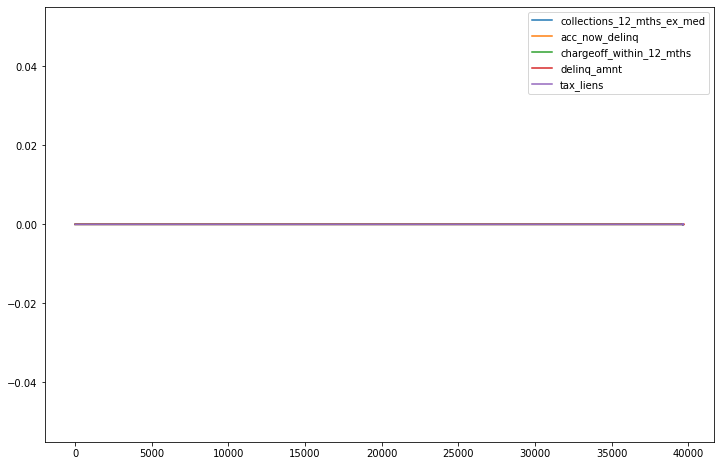

In [8]:
df[['collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']].plot(figsize=(12,8));

We plotted the data to make sure the values for these variables are in fact zero and that there aren't any outliers.

We need to understand the relationships between the variables in the dataset. Not all the data is numeric. As we can see, we have data of type `int64`, `float64`, `object` and `datetime`. If we try to run a correlation or try to create scatter plots and other visuals and calculations to find correlation they will fail because the data types are not homogeneous. We can filter the dataset by datatype and try to perform our analysis on the resulting subset of the data. 

In [9]:
df_nums = df.select_dtypes(include=['int64', 'float64'])
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  float64
 1   member_id                   39717 non-null  float64
 2   loan_amnt                   39717 non-null  float64
 3   funded_amnt                 39717 non-null  float64
 4   funded_amnt_inv             39717 non-null  float64
 5   int_rate                    39717 non-null  float64
 6   installment                 39717 non-null  float64
 7   annual_inc                  39717 non-null  float64
 8   dti                         39717 non-null  float64
 9   delinq_2yrs                 39717 non-null  float64
 10  inq_last_6mths              39717 non-null  float64
 11  mths_since_last_delinq      14035 non-null  float64
 12  mths_since_last_record      2786 non-null   float64
 13  open_acc                    397

Now we can run a correlation on the numerical data.


In [10]:
df_nums.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.078831,0.086587,0.008731,0.095983,-0.008644,-0.042378,0.117193,0.702130,0.020388,-0.019440,0.008763,0.094846,0.042149,0.180619,0.180591,0.140045,0.220838,0.112213,0.172856,-0.055082,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.074725,0.081025,0.009380,0.096963,-0.008119,-0.047086,0.122963,0.719538,0.017928,-0.018721,0.005113,0.093118,0.044374,0.170743,0.170706,0.139975,0.229307,0.112168,0.173234,-0.057750,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.309415,0.930288,0.271149,0.066439,-0.031864,0.009229,0.014871,0.004968,0.177168,-0.051236,0.317597,0.066149,0.256442,0.192937,0.192623,0.886613,0.854243,0.852021,0.729726,0.044706,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.312619,0.956159,0.266965,0.066283,-0.032355,0.009259,0.016359,-0.006059,0.175530,-0.052169,0.310392,0.069962,0.250589,0.194941,0.194675,0.903160,0.870799,0.870255,0.737469,0.046705,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.306657,0.905039,0.254375,0.074689,-0.038501,-0.005712,0.071924,0.437906,0.163027,-0.053214,0.290797,0.074939,0.242854,0.203688,0.203693,0.881228,0.913257,0.845848,0.730914,0.027172,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
int_rate,0.078831,0.074725,0.309415,0.312619,0.306657,1.000000,0.282703,0.053185,0.111162,0.157916,0.133013,-0.055613,0.330691,0.010395,0.097208,0.097100,0.467168,-0.043570,0.134616,0.134668,0.308268,0.303670,0.186882,0.529913,0.092591,0.122259,0.066380,0.157775,NaN,NaN,NaN,NaN,NaN,0.082550,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,0.282703,1.000000,0.270874,0.054186,-0.019657,0.009722,0.000047,-0.062171,0.172812,-0.046532,0.312679,0.095484,0.230824,0.125082,0.124932,0.856928,0.817416,0.850773,0.634725,0.056709,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.053185,0.270874,1.000000,-0.122732,0.023083,0.033908,-0.008822,-0.031866,0.158200,-0.018689,0.279961,0.017926,0.235771,0.033573,0.033472,0.257980,0.247119,0.259571,0.185476,0.006243,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.111162,0.054186,-0.122732,1.000000,-0.034452,0.001405,0.068815,0.187175,0.288045,-0.004621,0.228743,0.277951,0.229881,0.036095,0.036012,0.064766,0.071647,0.041316,0.106071,-0.011781,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,0.157916,-0.019657,0.023083,-0.034452,1.000000,0.008091,-0.569438,-0.036628,0.011656,0.007463,-0.055125,-0.043095,0.067892,-0.003008,-0.003203,-0.022695,-0.028976,-0.038795,0.023077,0.030609,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN


In [21]:
# Find the highly correlated pairs and sort them in descending order
corr_pairs = df.corr().unstack().sort_values(ascending=False).drop_duplicates()

In [22]:
corr_pairs = pd.DataFrame(corr_pairs[corr_pairs > 0.5]).reset_index() 
corr_pairs

,level_0,level_1,0
0,id,id,1.000000
1,out_prncp_inv,out_prncp,0.999827
2,member_id,id,0.993650
3,funded_amnt,loan_amnt,0.981578
4,total_pymnt,total_rec_prncp,0.971472
5,total_pymnt_inv,total_pymnt,0.970815
6,funded_amnt,funded_amnt_inv,0.958422
7,funded_amnt,installment,0.956159
8,loan_amnt,funded_amnt_inv,0.940034
9,total_rec_prncp,total_pymnt_inv,0.939581


In [23]:
x = list(corr_pairs['level_0'])
y = list(corr_pairs['level_1'])

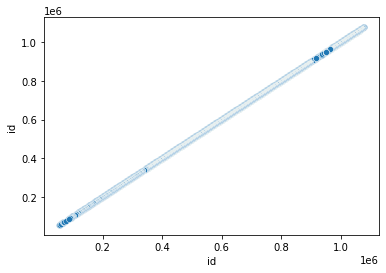

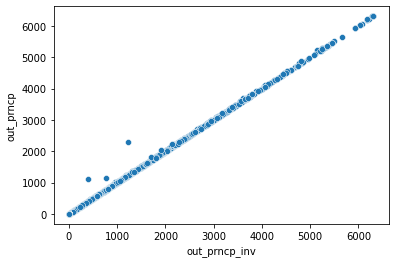

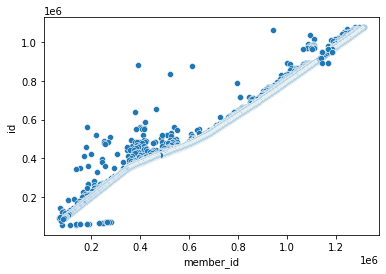

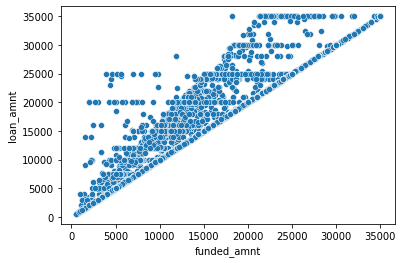

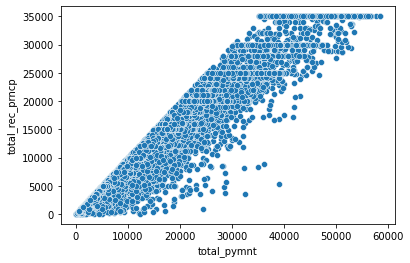

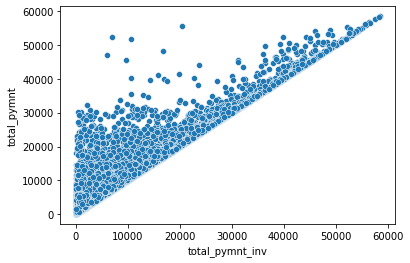

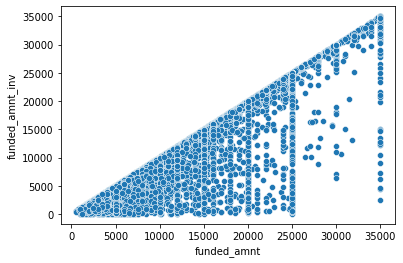

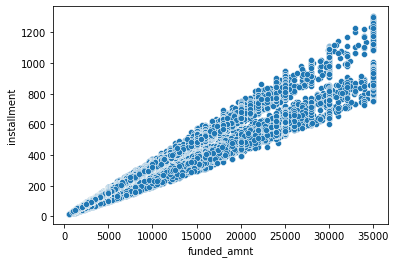

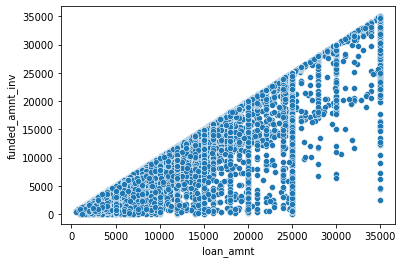

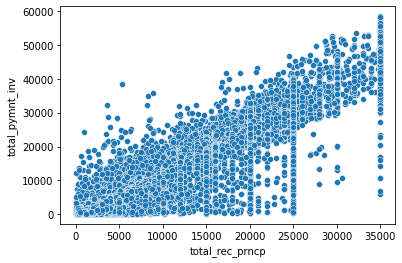

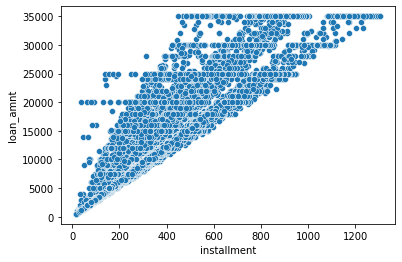

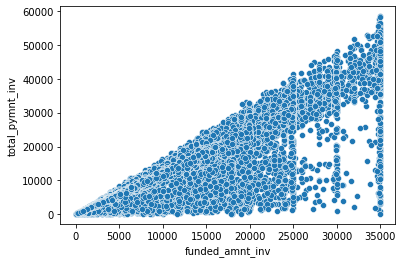

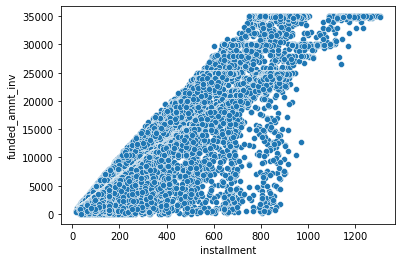

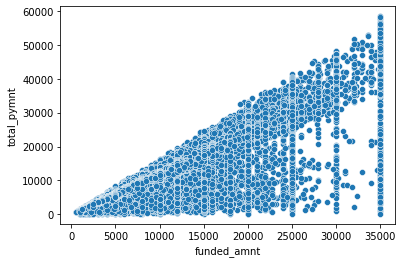

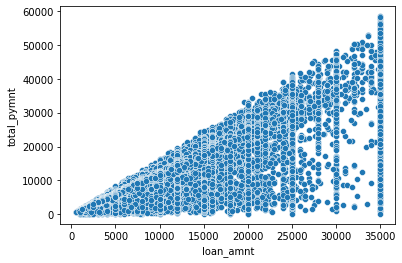

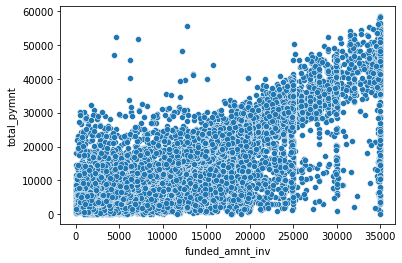

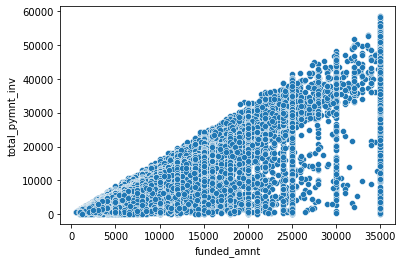

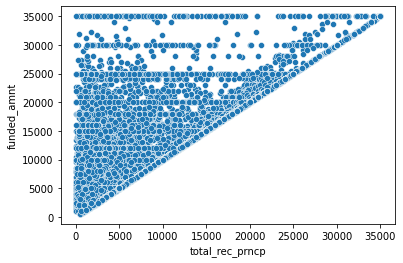

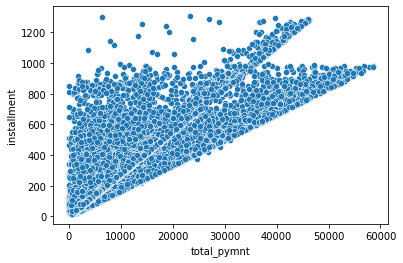

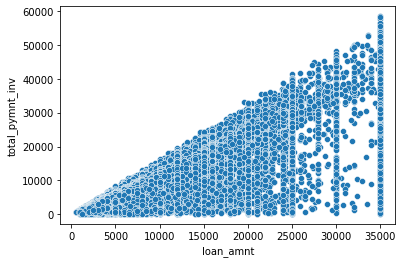

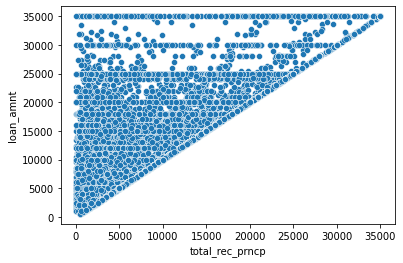

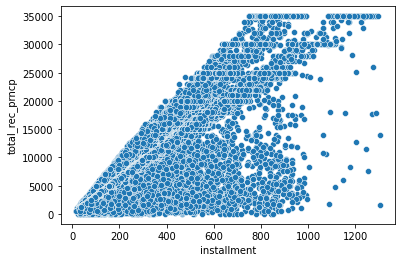

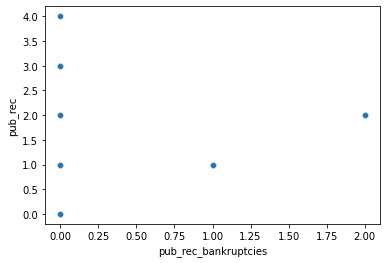

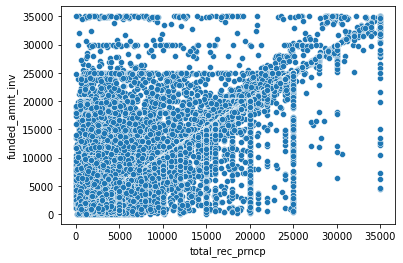

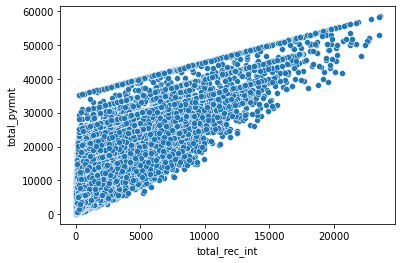

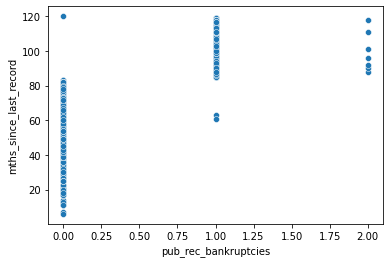

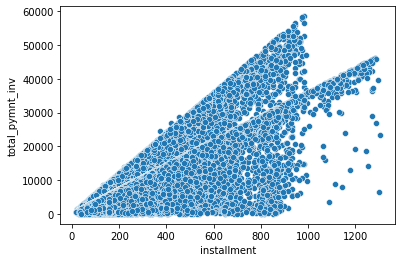

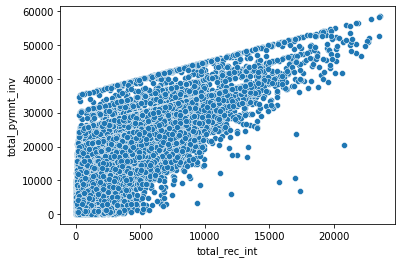

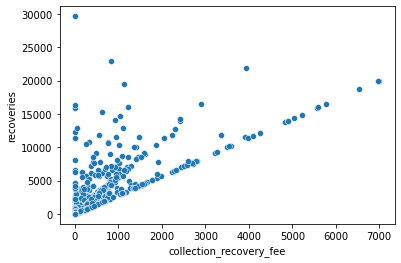

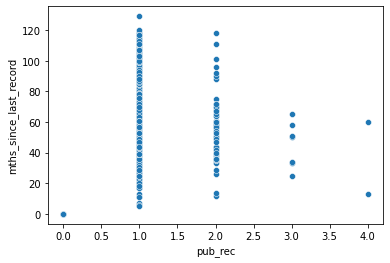

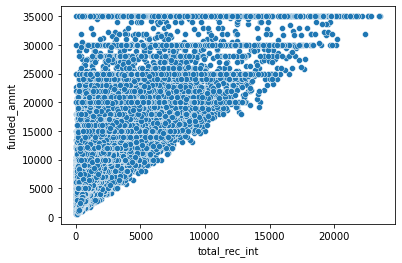

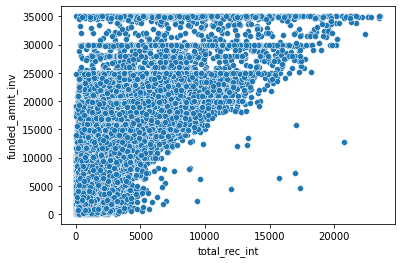

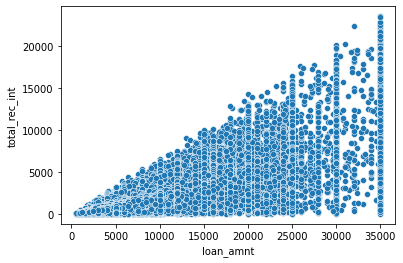

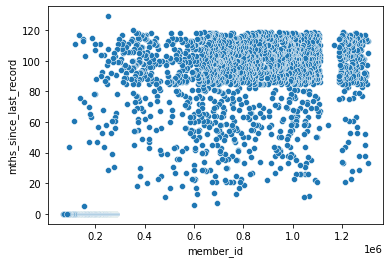

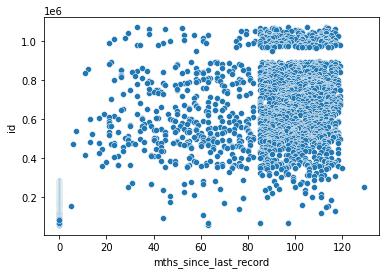

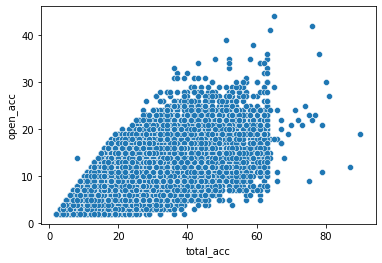

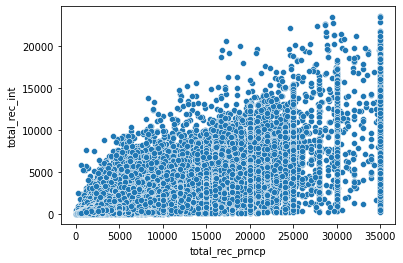

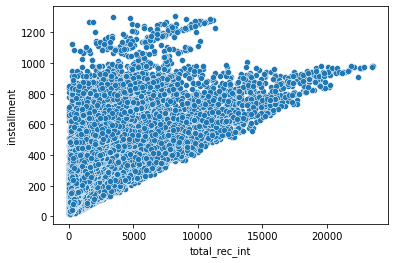

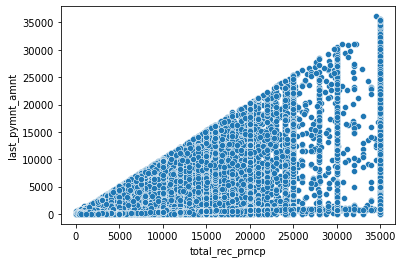

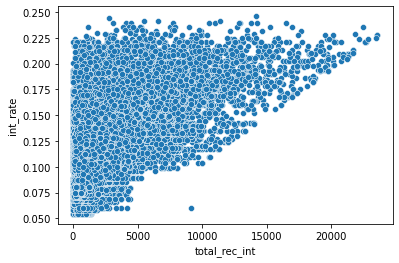

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

for (i, j) in itertools.zip_longest(x, y):
  sns.scatterplot(x=i, y=j, data=df_nums)
  print('\n')
  plt.show()
